In [49]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [50]:
df=pd.read_csv('2020-4-27.csv')

In [51]:
df.head(5)

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   int64  
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      1039 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Face        2211 non-null   object 
 9   Year        582 non-null    float64
 10  Views       2211 non-null   object 
 11  Area        2211 non-null   object 
 12  Road        2211 non-null   object 
 13  Road Width  2211 non-null   object 
 14  Road Type   1426 non-null   object 
 15  Build Area  2211 non-null   object 
 16  Posted      2211 non-null   object 
 17  Amenities   2211 non-null   object 
dtypes: float64(2), int64(4), object(12)
memory usage: 311.1+ KB


In [53]:
df1=df.drop(["Title","Year","Views","Build Area","Posted","Amenities"],axis=1)

In [54]:
df1.head(5)

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Area,Road,Road Width,Road Type
0,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
1,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
2,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
3,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped
4,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped


In [55]:
df1.City.value_counts()

City
Kathmandu      1483
Lalitpur        432
Bhaktapur        85
Pokhara          64
Chitwan          33
Nawalparasi      12
Makwanpur        12
Dharan           11
Jhapa            10
Sunsari           7
Kirtipur          7
Kavre             7
Butwal            6
Biratnagar        6
Bara              4
Dhading           4
Morang            4
Parsa             4
Itahari           3
Kaski             3
Rupandehi         3
Mahottari         1
Bardiya           1
Birtamod          1
Dang              1
Surkhet           1
Bhairahawa        1
Kapilvastu        1
Tanahu            1
Illam             1
Nawalpur          1
Kailali           1
Name: count, dtype: int64

In [56]:
city_counts = df.City.value_counts()
values_to_drop= city_counts[city_counts < 80].index.tolist()
print(values_to_drop)

['Pokhara', 'Chitwan', 'Nawalparasi', 'Makwanpur', 'Dharan', 'Jhapa', 'Sunsari', 'Kirtipur', 'Kavre', 'Butwal', 'Biratnagar', 'Bara', 'Dhading', 'Morang', 'Parsa', 'Itahari', 'Kaski', 'Rupandehi', 'Mahottari', 'Bardiya', 'Birtamod', 'Dang', 'Surkhet', 'Bhairahawa', 'Kapilvastu', 'Tanahu', 'Illam', 'Nawalpur', 'Kailali']


In [57]:
df2= df1.loc[~df1['City'].isin(values_to_drop)]

In [58]:
df2.City.value_counts()

City
Kathmandu    1483
Lalitpur      432
Bhaktapur      85
Name: count, dtype: int64

In [59]:
column=(df2.columns.tolist())
print(column)

['Address', 'City', 'Price', 'Bedroom', 'Bathroom', 'Floors', 'Parking', 'Face', 'Area', 'Road', 'Road Width', 'Road Type']


In [60]:
for col in column:
  num_unique = df2[col].nunique()
  print(f"Number of unique values in 'column_name': {num_unique}")
  print(f"Unique value and count of {col} in Dataframe")
  print(df2[col].value_counts())
  print("\n")

Number of unique values in 'column_name': 1396
Unique value and count of Address in Dataframe
Address
Na, Budhanilkantha, Kathmandu                                           38
Budhanilkantha, Budhanilkantha, Kathmandu                               24
Hattigauda, Hattigauda, Kathmandu                                       17
Basundhara, Basundhara, Kathmandu                                       16
Bhaisepati, Bhaisepati, Lalitpur                                        16
                                                                        ..
Khahare-Gothatar near mahantar chowk, Kageshwari-Manohara, Kathmandu     1
Tinthana, Balkhu, Kathmandu                                              1
Gurjudhara, Gurujudhara, Kathmandu                                       1
Dallu, Swayambhu, Kathmandu                                              1
Gocha marg, Baluwatar, Kathmandu                                         1
Name: count, Length: 1396, dtype: int64


Number of unique values in 'col

In [61]:
df2.columns.tolist()

['Address',
 'City',
 'Price',
 'Bedroom',
 'Bathroom',
 'Floors',
 'Parking',
 'Face',
 'Area',
 'Road',
 'Road Width',
 'Road Type']

In [62]:
df2.drop(["Address","Bedroom","Bathroom","Parking","Road"],axis=1,inplace=True)

C:\Windows\Temp\ipykernel_1464\3092017312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["Address","Bedroom","Bathroom","Parking","Road"],axis=1,inplace=True)


In [63]:
df2.head(10)

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,1-0-0-0 Aana,20 Feet,Blacktopped
1,Kathmandu,80000000,2.0,East,0-21-0-0 Aana,20 Feet,Blacktopped
2,Kathmandu,70000000,2.0,East,1-1-0-0 Aana,20 Feet,Blacktopped
3,Kathmandu,130000000,3.0,West,0-10-1-0 Aana,20 Feet,Blacktopped
4,Kathmandu,100000000,2.0,East,0-19-2-0 Aana,20 Feet,Blacktopped
5,Kathmandu,100000000,3.0,East,0-12-3-1 Aana,13 Feet,Blacktopped
6,Lalitpur,11000000,3.0,South East,3-1-1 Aana,11 Feet,Gravelled
7,Kathmandu,50000000,2.0,East,0-8-5-0 Aana,20 Feet,Blacktopped
8,Kathmandu,100000000,3.5,North,0-12-3-2 Aana,20 Feet,Blacktopped
9,Kathmandu,32500000,2.5,South East,0-4-0-0 Aana,12 Feet,Concrete


In [64]:
# Function to convert each entry to Aana
import re
def convert_to_aana(area):
    area = area.strip()

    # Check for "Ropani" and convert
    if "Ropani" in area:
        ropani = float(re.findall(r'\d+', area)[0])
        return ropani * 16

    # Check for "Sq. Feet" and convert to aana
    if "Sq. Feet" in area:
        # Extract the numeric part using regex
        matches = re.findall(r'\d+', area)
        if matches:  # Ensure there is at least one match
            sq_feet = float(matches[0])
            return sq_feet / 342.25  # Convert to aana

    # Check for a-b-c-d Aana format
    if re.match(r'\d+-\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        a, b, c, d = parts
        return a * 16 + b + c / 4 + d / 16

    # Check for x-y-z Aana format
    if re.match(r'\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y, z = parts
        return x + y / 4 + z / 16

    # Check for x-y Aana format
    if re.match(r'\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y = parts
        return x + y / 4

    # Check for "X Aana" format (including decimals)
    if re.match(r'^\d+\.?\d* Aana$', area):
        return float(re.findall(r'\d+\.?\d*', area)[0])

    # If none of the formats match, return "Remove"
    return "Remove"

In [65]:
df2['Area'] = df2['Area'].apply(convert_to_aana)

C:\Windows\Temp\ipykernel_1464\318096488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Area'] = df2['Area'].apply(convert_to_aana)


In [66]:
df2.head(5)

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,16.0,20 Feet,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0,20 Feet,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0,20 Feet,Blacktopped
3,Kathmandu,130000000,3.0,West,10.25,20 Feet,Blacktopped
4,Kathmandu,100000000,2.0,East,19.5,20 Feet,Blacktopped


In [67]:
df2.Area.value_counts().get('Remove',0)

65

In [68]:
df2 = df2[df2.Area != 'Remove']

In [69]:
df2.shape

(1935, 7)

In [70]:
nan_count = df2.isna().sum()

print(nan_count)

City             0
Price            0
Floors        1000
Face             0
Area             0
Road Width       0
Road Type      710
dtype: int64


In [71]:
def convert_to_feet(value):
    if 'Meter' in value:
        # Extract the numerical part, convert to float, and multiply by 3.28084 to convert to feet
        meters = int(float(value.replace(' Meter', '')))
        return meters * 3.28084
    elif 'Feet' in value:
        # Extract the numerical part and return as is
        return int(float(value.replace(' Feet', '')))
    else:
        return "Remove"

In [72]:
df3=df2.copy()

In [73]:
df3['Road Width'] = df3['Road Width'].apply(convert_to_feet)

In [74]:
df3[50:100]

,City,Price,Floors,Face,Area,Road Width,Road Type
53,Kathmandu,46000000,2.5,South West,6.75,13.00000,Concrete
54,Kathmandu,22500000,3.0,East,4.0,13.00000,NaN
55,Bhaktapur,29000000,2.0,North,4.5,20.00000,Blacktopped
56,Kathmandu,31000000,3.0,East,3.0,19.68504,Blacktopped
57,Kathmandu,42500000,NaN,West,5.3125,29.00000,NaN
58,Kathmandu,37500000,3.0,South East,5.0,0.00000,NaN
60,Kathmandu,105000000,NaN,South,64.0,20.00000,NaN
61,Kathmandu,80000000,NaN,West,9.9375,13.00000,Gravelled
62,Lalitpur,25000000,2.0,East,4.5,13.00000,Gravelled
63,Bhaktapur,32500000,2.0,South,7.0,20.00000,Paved


In [75]:
df3['Road Width'].value_counts().get('Remove',0)

0

In [76]:
df3.to_csv('CleanedData.csv', index=False)

In [77]:
df3 = pd.read_csv('CleanedData.csv')

In [78]:
df3.head(10)

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,16.0000,20.0,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0000,20.0,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0000,20.0,Blacktopped
3,Kathmandu,130000000,3.0,West,10.2500,20.0,Blacktopped
4,Kathmandu,100000000,2.0,East,19.5000,20.0,Blacktopped
5,Kathmandu,100000000,3.0,East,12.8125,13.0,Blacktopped
6,Lalitpur,11000000,3.0,South East,3.3125,11.0,Gravelled
7,Kathmandu,50000000,2.0,East,9.2500,20.0,Blacktopped
8,Kathmandu,100000000,3.5,North,12.8750,20.0,Blacktopped
9,Kathmandu,32500000,2.5,South East,4.0000,12.0,Concrete


In [79]:
df3["Road Type"].unique()

array([' Blacktopped', ' Gravelled', ' Concrete', ' Paved', nan,
       ' Soil Stabilized', ' Alley'], dtype=object)

In [80]:
df4=df3.loc[~df3['Road Type'].isin([' Alley'])]

In [81]:
df4.loc[df4['Road Type'].isin([' Paved', ' Concrete']), 'Road Type'] = 'Blacktopped'
df4['Road Type'] = df4['Road Type'].fillna(' Soil Stabilized')

C:\Windows\Temp\ipykernel_1464\3805244281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Road Type'] = df4['Road Type'].fillna(' Soil Stabilized')


In [82]:
df4['Road Type'] = df4['Road Type'].str.strip()

C:\Windows\Temp\ipykernel_1464\388227776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Road Type'] = df4['Road Type'].str.strip()


In [83]:
df4['Road Type'].value_counts()

Road Type
Soil Stabilized    846
Blacktopped        746
Gravelled          341
Name: count, dtype: int64

In [84]:
df4['Floors'].mean()

2.89330835117773

In [85]:
df4['Floors'] = df4['Floors'].fillna(2.75)

C:\Windows\Temp\ipykernel_1464\1291682311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Floors'] = df4['Floors'].fillna(2.75)


In [86]:
df4.isna().sum()

City          0
Price         0
Floors        0
Face          0
Area          0
Road Width    0
Road Type     0
dtype: int64

In [87]:
df4.to_csv('CleanedData1.csv', index=False)

In [88]:
df4 = pd.read_csv('CleanedData1.csv')

In [89]:
df4 = df4[(df4['Price'] >=10000000 ) & (df4['Price'] <=100000000 )]

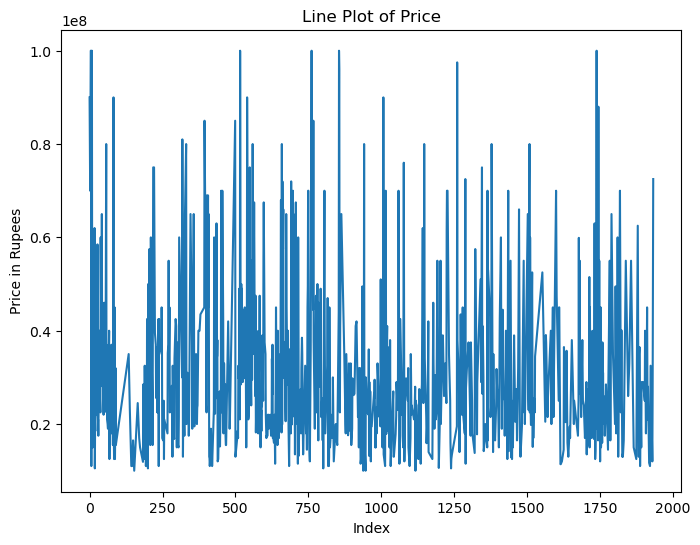

In [90]:
plt.figure(figsize=(8, 6))
df4['Price'].plot(kind='line')

# Add labels and title
plt.title('Line Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price in Rupees')

# Show the plot
plt.show()

In [91]:
df4.reset_index(drop=True, inplace=True)

In [92]:
df4.shape

(915, 7)

In [93]:
print(df4.index)

RangeIndex(start=0, stop=915, step=1)


In [94]:
df4.head()

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.0,West,16.0000,20.0,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0000,20.0,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0000,20.0,Blacktopped
3,Kathmandu,100000000,2.0,East,19.5000,20.0,Blacktopped
4,Kathmandu,100000000,3.0,East,12.8125,13.0,Blacktopped


In [95]:
df4 = df4[~((df4['Price'] > 20000000) & (df4['Floors'] < 2) & (df4['Area'] < 4))]
df4 = df4[~((df4['Price'] > 20000000) & (df4['Area'] < 2.5))]
df4 = df4[~((df4['Price'] > 50000000) & (df4['Floors'] < 3) & (df4['Area'] < 5))]
df4 = df4[~((df4['Price'] < 50000000) & (df4['Area'] > 15))]
df4 = df4[~((df4['Price'] < 16000000) & (df4['Floors'] > 2.5))]

In [96]:
df4.shape

(809, 7)

In [97]:
df4.head(50)

,City,Price,Floors,Face,Area,Road Width,Road Type
0,Kathmandu,90000000,2.00,West,16.0000,20.00000,Blacktopped
1,Kathmandu,80000000,2.00,East,21.0000,20.00000,Blacktopped
2,Kathmandu,70000000,2.00,East,17.0000,20.00000,Blacktopped
3,Kathmandu,100000000,2.00,East,19.5000,20.00000,Blacktopped
4,Kathmandu,100000000,3.00,East,12.8125,13.00000,Blacktopped
6,Kathmandu,50000000,2.00,East,9.2500,20.00000,Blacktopped
7,Kathmandu,100000000,3.50,North,12.8750,20.00000,Blacktopped
8,Kathmandu,32500000,2.50,South East,4.0000,12.00000,Blacktopped
9,Kathmandu,39900000,3.00,North West,4.5000,14.00000,Blacktopped
10,Kathmandu,15000000,1.00,South,5.0000,12.00000,Gravelled


In [98]:
df_perAana = pd.DataFrame({'Price_per_aana': df4['Price'] / df4['Area']})

In [99]:
df_perAana.head(5)

,Price_per_aana
0,5.625000e+06
1,3.809524e+06
2,4.117647e+06
3,5.128205e+06
4,7.804878e+06


In [100]:
df_perAana.replace([float('inf'), -float('inf')], np.nan, inplace=True)
df_perAana.dropna(inplace=True)

In [101]:
# Check for NaN values
nan_count = df_perAana['Price_per_aana'].isna().sum()
print(f"Number of NaN values: {nan_count}")

# Check for infinite values
inf_count = (df_perAana['Price_per_aana'] == float('inf')).sum()
print(f"Number of infinite values: {inf_count}")

Number of NaN values: 0
Number of infinite values: 0


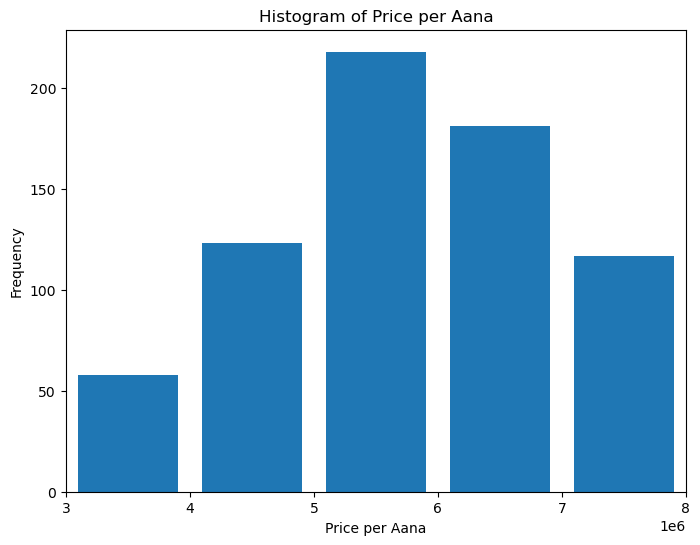

In [102]:
plt.figure(figsize=(8, 6))
bins = [3000000, 4000000, 5000000, 6000000, 7000000, 8000000]
plt.hist(df_perAana['Price_per_aana'], bins = bins,rwidth=0.8)
plt.xlim(3000000, 8000000)
plt.title('Histogram of Price per Aana')
plt.xlabel('Price per Aana')
plt.ylabel('Frequency')
plt.show()

In [103]:
df4.to_csv('CleanedData2.csv', index=False)

In [104]:
df4.shape

(809, 7)

In [105]:
df4 = pd.read_csv('CleanedData2.csv')

In [106]:
df4 = df4[~((df4['Area'] < 2.0))]

In [107]:
df4.columns = df4.columns.str.replace(' ', '_')

In [108]:
df4.columns

Index(['City', 'Price', 'Floors', 'Face', 'Area', 'Road_Width', 'Road_Type'], dtype='object')

In [109]:
df4.head(5)

,City,Price,Floors,Face,Area,Road_Width,Road_Type
0,Kathmandu,90000000,2.0,West,16.0000,20.0,Blacktopped
1,Kathmandu,80000000,2.0,East,21.0000,20.0,Blacktopped
2,Kathmandu,70000000,2.0,East,17.0000,20.0,Blacktopped
3,Kathmandu,100000000,2.0,East,19.5000,20.0,Blacktopped
4,Kathmandu,100000000,3.0,East,12.8125,13.0,Blacktopped


Text(0, 0.5, 'Average Price')

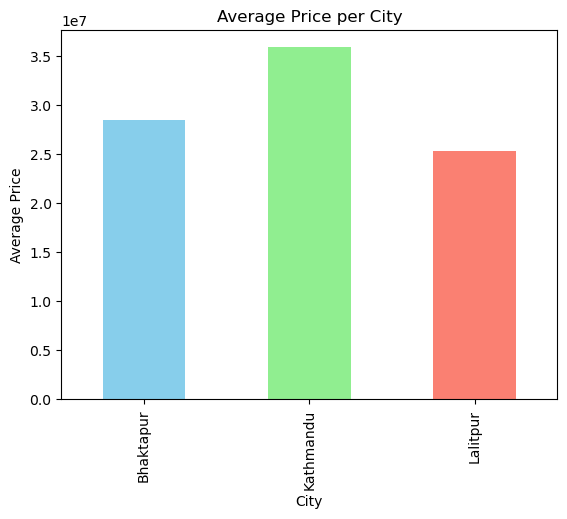

In [110]:
avg_price_per_city = df4.groupby('City')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

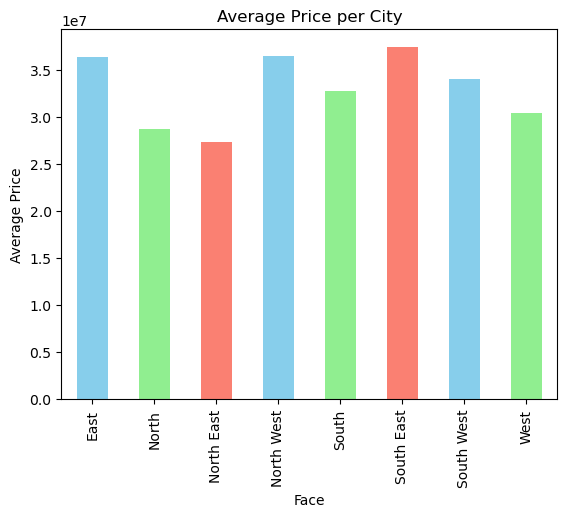

In [111]:
avg_price_per_city = df4.groupby('Face')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Price per City')
plt.xlabel('Face')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

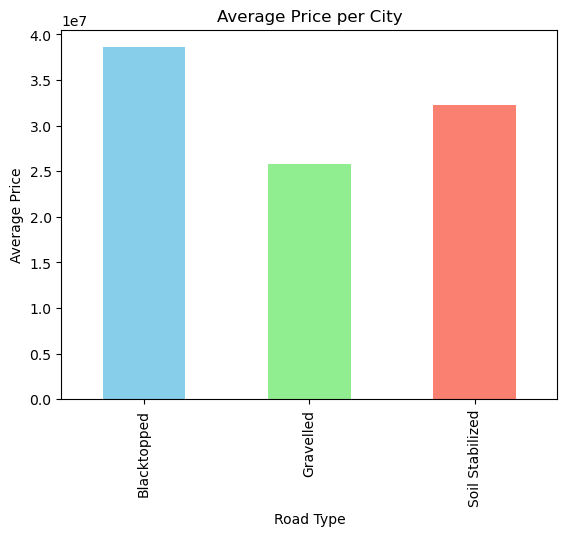

In [112]:
avg_price_per_city = df4.groupby('Road_Type')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Price per City')
plt.xlabel('Road Type')
plt.ylabel('Average Price')

In [113]:
print(df4.dtypes)

City           object
Price           int64
Floors        float64
Face           object
Area          float64
Road_Width    float64
Road_Type      object
dtype: object


In [114]:
df4.drop('Face',axis=1,inplace=True)

In [115]:
# Apply one-hot encoding to only 'City' and 'Road Type'
encoded_columns = pd.get_dummies(df4[['City', 'Road_Type']], dtype=int)

# Drop the original 'City' and 'Road Type' columns
df4 = df4.drop(['City', 'Road_Type'], axis=1)

# Concatenate the one-hot encoded columns to the DataFrame
df4 = pd.concat([df4, encoded_columns], axis=1)

In [116]:
df4.head()

,Price,Floors,Area,Road_Width,City_Bhaktapur,City_Kathmandu,City_Lalitpur,Road_Type_Blacktopped,Road_Type_Gravelled,Road_Type_Soil Stabilized
0,90000000,2.0,16.0000,20.0,0,1,0,1,0,0
1,80000000,2.0,21.0000,20.0,0,1,0,1,0,0
2,70000000,2.0,17.0000,20.0,0,1,0,1,0,0
3,100000000,2.0,19.5000,20.0,0,1,0,1,0,0
4,100000000,3.0,12.8125,13.0,0,1,0,1,0,0


In [117]:
print(df4.dtypes)

Price                          int64
Floors                       float64
Area                         float64
Road_Width                   float64
City_Bhaktapur                 int32
City_Kathmandu                 int32
City_Lalitpur                  int32
Road_Type_Blacktopped          int32
Road_Type_Gravelled            int32
Road_Type_Soil Stabilized      int32
dtype: object


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df4['Price'] = scaler.fit_transform(df4[['Price']])

In [119]:
df4.head()

,Price,Floors,Area,Road_Width,City_Bhaktapur,City_Kathmandu,City_Lalitpur,Road_Type_Blacktopped,Road_Type_Gravelled,Road_Type_Soil Stabilized
0,3.132908,2.0,16.0000,20.0,0,1,0,1,0,0
1,2.576956,2.0,21.0000,20.0,0,1,0,1,0,0
2,2.021003,2.0,17.0000,20.0,0,1,0,1,0,0
3,3.688861,2.0,19.5000,20.0,0,1,0,1,0,0
4,3.688861,3.0,12.8125,13.0,0,1,0,1,0,0


In [120]:
df4.to_csv('cleanedData3.csv', index=False)